In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True)

from jne_functions import *
from ipywidgets import interactive, FloatSlider
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [2]:
df=pd.read_csv('bank_marketing_modified.csv')
df

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,cons.conf.idx,euribor3m,nr.employed,deposit,age_group,season,pdays_bin,year,employment,month_num
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,-36.4,4.857,5191.0,0,Middle-aged,spring,0,2008,employed,5
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,-36.4,4.857,5191.0,0,Middle-aged,spring,0,2008,employed,5
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,-36.4,4.857,5191.0,0,Adult,spring,0,2008,employed,5
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,-36.4,4.857,5191.0,0,Middle-aged,spring,0,2008,employed,5
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,-36.4,4.857,5191.0,0,Middle-aged,spring,0,2008,employed,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,41183,73,retired,married,professional.course,no,yes,no,cellular,nov,...,-50.8,1.028,4963.6,1,Senior,fall,0,2010,retired,11
41172,41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,...,-50.8,1.028,4963.6,0,Middle-aged,fall,0,2010,employed,11
41173,41185,56,retired,married,university.degree,no,yes,no,cellular,nov,...,-50.8,1.028,4963.6,0,Middle-aged,fall,0,2010,retired,11
41174,41186,44,technician,married,professional.course,no,no,no,cellular,nov,...,-50.8,1.028,4963.6,1,Middle-aged,fall,0,2010,employed,11


In [29]:
X=df.loc[:,['campaign','previous','emp.var.rate','poutcome','euribor3m','nr.employed',
            'cons.price.idx','cons.conf.idx','marital','education','contact','employment',
            'housing','loan','day_of_week','pdays_bin','age_group','default','month','year']]
y=df['deposit']

In [30]:
param_grid={'classifier__n_estimators':[100,500,200],
           'classifier__max_depth':[3,5,7],
           'classifier__learning_rate':[0.1,0.05,0.15],
            'classifier__use_label_encoder':[False],
           'classifier__subsample':[0.5,0.8,1],
           'classifier__min_child_weight':[3,5,7],
           'classifier__colsample_bytree':[.5,.8,1],
           'classifier__objective':['binary:logistic'],
           'classifier__scale_pos_weight':[8,10]}
classifiers_no_stan(xgb.XGBClassifier(),X,y)
from jne_functions import pipe, X_train, X_test, y_train, y_test

from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')
rand_XGB=RandomizedSearchCV(pipe,param_distributions=param_grid,cv=5, scoring=f1, n_iter=25)
rand_XGB.fit(X_train,y_train)
rand_XGB.best_params_

[21:24:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:11] WARNING: /home/conda/feedstock_r

[21:24:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:24:46] WARNING: /home/conda/feedstock_r

[21:25:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:25:58] WARNING: /home/conda/feedstock_r

[21:26:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:26:51] WARNING: /home/conda/feedstock_r

[21:27:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:27:40] WARNING: /home/conda/feedstock_r

{'classifier__use_label_encoder': False,
 'classifier__subsample': 0.5,
 'classifier__scale_pos_weight': 8,
 'classifier__objective': 'binary:logistic',
 'classifier__n_estimators': 100,
 'classifier__min_child_weight': 5,
 'classifier__max_depth': 7,
 'classifier__learning_rate': 0.05,
 'classifier__colsample_bytree': 0.5}

In [31]:
confusion_matrix(y_test, rand_XGB.predict(X_test))

array([[6218, 1090],
       [ 341,  587]])

In [32]:
interactive(lambda threshold: make_confusion_matrix(rand_XGB, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

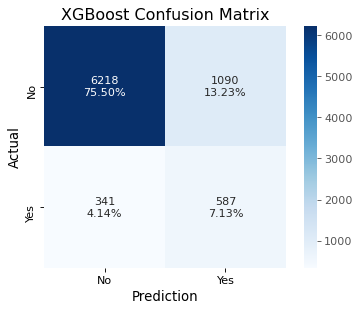

In [33]:
make_confusion_matrix(rand_XGB,0.50)
plt.title('XGBoost Confusion Matrix')
plt.savefig('XGB_confusion_matrix.svg',format='svg');

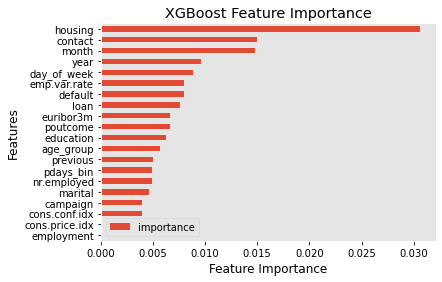

In [34]:
feats={}
for feature,importance in zip(X_train.columns, rand_XGB.best_estimator_.named_steps['classifier'].feature_importances_):
    feats[feature]=importance
importances=pd.DataFrame.from_dict(feats,orient='index').rename(columns={0:'importance'})
importances.sort_values(by='importance').plot(kind='barh')
plt.title('XGBoost Feature Importance')
plt.tick_params(colors='black')
plt.grid(b=None)
plt.ylabel('Features').set_color('black')
plt.xlabel('Feature Importance').set_color('black')
plt.savefig('xgboost_feature_importance.svg',format='svg');

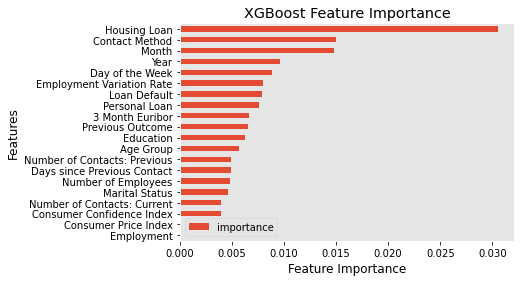

In [35]:
feats={}
for feature,importance in zip(X_train.columns, rand_XGB.best_estimator_.named_steps['classifier'].feature_importances_):
    feats[feature]=importance
importances=pd.DataFrame.from_dict(feats,orient='index').rename(columns={0:'importance'})
importances.sort_values(by='importance').plot(kind='barh')
plt.title('XGBoost Feature Importance')
plt.tick_params(colors='black')
plt.grid(b=None)

y=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
labels=['Employment','Consumer Price Index','Consumer Confidence Index','Number of Contacts: Current',
       'Marital Status','Number of Employees','Days since Previous Contact','Number of Contacts: Previous',
       'Age Group','Education','Previous Outcome','3 Month Euribor','Personal Loan','Loan Default',
       'Employment Variation Rate','Day of the Week','Year','Month','Contact Method','Housing Loan']
plt.yticks(y,labels)
plt.ylabel('Features').set_color('black')
plt.xlabel('Feature Importance').set_color('black')
plt.savefig('xgboost_feature_importance_detailed.svg',format='svg');

In [36]:
rand_XGB.best_estimator_.named_steps['classifier'].feature_importances_

array([0.00398557, 0.00496461, 0.00795249, 0.00659086, 0.00661705,
       0.0048603 , 0.        , 0.00393149, 0.00465726, 0.00626587,
       0.01497205, 0.        , 0.03057766, 0.00760506, 0.00885423,
       0.0048953 , 0.00566159, 0.00794633, 0.0147625 , 0.00962861,
       0.01557217, 0.02847927, 0.04250694, 0.00731113, 0.0282054 ,
       0.02068855, 0.00620855, 0.0036856 , 0.00742073, 0.00509872,
       0.00562228, 0.00457638, 0.00491484, 0.00448471, 0.00552042,
       0.01975766, 0.00683114, 0.00690327, 0.13694412, 0.15453659,
       0.33000275], dtype=float32)

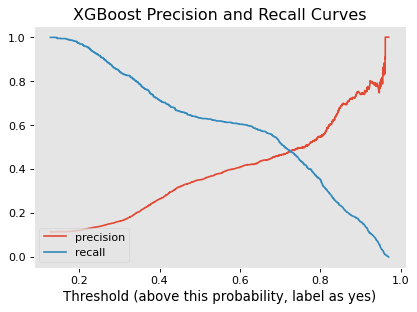

In [37]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, rand_XGB.predict_proba(X_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as yes)').set_color('black')
plt.tick_params(colors='black')
plt.grid(b=None)
plt.title('XGBoost Precision and Recall Curves');
plt.savefig('XGBoost_prcurve.svg',format='svg')

In [38]:
y_predict = rand_XGB.predict(X_test)
f1_score(y_test, y_predict,average='macro')

0.6737385751422169

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7308
           1       0.35      0.63      0.45       928

    accuracy                           0.83      8236
   macro avg       0.65      0.74      0.67      8236
weighted avg       0.88      0.83      0.85      8236



In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, rand_XGB.predict_proba(X_test)[:,1])

ROC AUC score =  0.7922325911141309


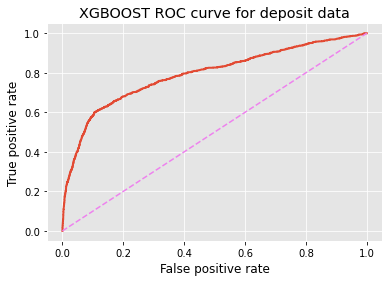

In [41]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate').set_color('black')
plt.ylabel('True positive rate').set_color('black')
plt.tick_params(colors='black')
plt.title('XGBOOST ROC curve for deposit data')
plt.savefig('XGboostROC.svg',format='svg');
print("ROC AUC score = ", roc_auc_score(y_test, rand_XGB.predict_proba(X_test)[:,1]))

# Random Oversampling

In [12]:
param_grid={'classifier__n_estimators':[100,200,500],
           'classifier__max_depth':[3,5,7],
           'classifier__use_label_encoder':[False],
           'classifier__learning_rate':[0.1,0.05,0.15],
           'classifier__subsample':[0.5,0.8,1],
           'classifier__min_child_weight':[1,3,5,],
           'classifier__colsample_bytree':[.5,.8,1],
           'classifier__objective':['binary:logistic']}
classifiers_no_stan(xgb.XGBClassifier(),X,y)
from jne_functions import pipe, X_train, X_test, y_train, y_test

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
ros_X_train, ros_y_train = ros.fit_sample(X_train,y_train)

from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')
rand_XGB_OVER=RandomizedSearchCV(pipe,param_distributions=param_grid,cv=5, scoring=f1, n_iter=25)
rand_XGB_OVER.fit(ros_X_train,ros_y_train)
rand_XGB_OVER.best_params_

[18:37:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:19] WARNING: /home/conda/feedstock_r

[18:37:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:37:53] WARNING: /home/conda/feedstock_r

[18:38:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:29] WARNING: /home/conda/feedstock_r

[18:38:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:56] WARNING: /home/conda/feedstock_r

[18:39:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:52] WARNING: /home/conda/feedstock_r

{'classifier__use_label_encoder': False,
 'classifier__subsample': 0.8,
 'classifier__objective': 'binary:logistic',
 'classifier__n_estimators': 500,
 'classifier__min_child_weight': 5,
 'classifier__max_depth': 7,
 'classifier__learning_rate': 0.15,
 'classifier__colsample_bytree': 1}

In [13]:
confusion_matrix(y_test, rand_XGB_OVER.predict(X_test))

array([[6116, 1192],
       [ 411,  517]])

In [14]:
interactive(lambda threshold: make_confusion_matrix(rand_XGB_OVER, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [15]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7308
           1       0.35      0.63      0.45       928

    accuracy                           0.83      8236
   macro avg       0.65      0.74      0.67      8236
weighted avg       0.88      0.83      0.85      8236



In [16]:
OS_fpr, OS_tpr, thresholds = roc_curve(y_test, rand_XGB_OVER.predict_proba(X_test)[:,1])

ROC AUC score =  0.7415434254855331


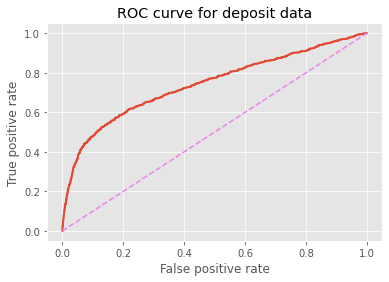

In [17]:
plt.plot(OS_fpr, OS_tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for deposit data');
print("ROC AUC score = ", roc_auc_score(y_test, rand_XGB_OVER.predict_proba(X_test)[:,1]))